# Cyclistic Bike-Share Analysis Business Case Study🚲
**Objective:**  
Cyclistic, a bike-share company in Chicago, wants to increase its **annual memberships** by converting **casual riders** into **subscribers**. This project aims to analyze how casual riders and annual members use Cyclistic bikes differently.

Main Problem: How do annual members and casual riders use Cyclistic bikes differently?

Junior Data Analyst Team: Cuthbert, Cheslea

We will explore the previous 12 months of rides datasets, merge them, clean them, and analyze for insights, and summarize our key findings, as well as provide with our TOP THREE RECOMMENDATION BASED ON OUR ANALYSIS.


# 🚲 Cyclistic Bike-Share Analysis - Business Task
## 🏆 Business Problem
Cyclistic, a bike-share company in Chicago, wants to convert **casual riders** into **annual members** because members generate more revenue. To support this goal, we need to analyze **how annual members and casual riders use Cyclistic bikes differently.**

## 🎯 Key Business Question
**How do annual members and casual riders use Cyclistic bikes differently?**

## 👥 Key Stakeholders
- **Cyclistic Marketing Team** - Needs insights to create effective membership conversion strategies.
- **Cyclistic Executive Team** - Makes final business decisions based on data-driven recommendations.


### **DATA PREPARATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define the folder path where your CSVs are stored
folder_path = "/content/drive/My Drive/Cyclistic_Dataset"

# Check if the folder is accessible
print(os.listdir(folder_path))  # Should show all 12 CSV files


['202402-divvy-tripdata.csv', '202403-divvy-tripdata.csv', '202412-divvy-tripdata.csv', '202405-divvy-tripdata.csv', '202411-divvy-tripdata.csv', '202404-divvy-tripdata.csv', '202409-divvy-tripdata.csv', '202406-divvy-tripdata.csv', '202408-divvy-tripdata.csv', '202401-divvy-tripdata.csv', '202407-divvy-tripdata.csv', '202410-divvy-tripdata.csv']


## CHECKING ONE MONTH ( JANUARY )

In [ ]:
import pandas as pd

# Load one sample file
sample_file = os.path.join(folder_path, "202401-divvy-tripdata.csv")
df = pd.read_csv(sample_file)

# Display first few rows
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


# 📂 Dataset Description
## 🏛️ Data Source
The dataset comes from **Cyclistic’s public trip data** for 12 months in 2024.

## 🔑 Key Features
| Column Name | Description |
|------------|-------------|
| `ride_id` | Unique trip ID |
| `started_at` | Start time of the ride |
| `ended_at` | End time of the ride |
| `rideable_type` | Type of bike (classic, electric, docked) |
| `start_station_name` | Where the ride started |
| `end_station_name` | Where the ride ended |
| `member_casual` | Rider type: **member** or **casual** |
| `ride_duration` | To be calculated (trip length in minutes) |

## 📌 Data Integrity & Credibility
- **✅ Licensing & Privacy:** The dataset does not contain **personally identifiable information** (PII).
- **⚠️ Bias Check:** Only includes **trips from Cyclistic** (not other bike services in Chicago).
- **🛠️ Data Issues to Fix:** Missing values, duplicates, and data type conversions.


In [ ]:
import pandas as pd
from glob import glob

# Define the folder path
folder_path = "/content/drive/My Drive/Cyclistic_Dataset"

# Get all CSV file paths
all_files = sorted(glob(folder_path + "/*.csv"))  # Ensure files are sorted in order
print(f"Total files found: {len(all_files)}")

# Initialize an empty DataFrame
df_combined = pd.DataFrame()

# Load and merge each file one by one
for file in all_files:
    df_temp = pd.read_csv(file, low_memory=False)

    # Print file info before merging
    print(f"\n📂 Processing: {file}")
    print(f"Rows: {df_temp.shape[0]} | Missing started_at: {df_temp['started_at'].isnull().sum()} | Missing ended_at: {df_temp['ended_at'].isnull().sum()}")

    # Ensure both 'started_at' and 'ended_at' exist and have valid timestamps
    if 'started_at' in df_temp.columns and df_temp['started_at'].notnull().sum() > 0:
        df_temp['started_at'] = pd.to_datetime(df_temp['started_at'], errors='coerce')

    if 'ended_at' in df_temp.columns and df_temp['ended_at'].notnull().sum() > 0:
        df_temp['ended_at'] = pd.to_datetime(df_temp['ended_at'], errors='coerce')

    # Ensure year_month column is extracted correctly
    df_temp['year_month'] = df_temp['started_at'].dt.to_period('M')

    # Merge with main dataframe
    df_combined = pd.concat([df_combined, df_temp], ignore_index=True)
    print(f"✅ Merged successfully! New total rows: {df_combined.shape[0]}")

# Verify final dataset
print("\n📊 Final Dataset Shape:", df_combined.shape)
print("✅ Year-Month Counts:\n", df_combined['year_month'].value_counts().sort_index())

# Final check for missing timestamps
print("\n🔍 Missing 'started_at' after merging:", df_combined['started_at'].isna().sum())
print("🔍 Missing 'ended_at' after merging:", df_combined['ended_at'].isna().sum())


Total files found: 12

📂 Processing: /content/drive/My Drive/Cyclistic_Dataset/202401-divvy-tripdata.csv
Rows: 144873 | Missing started_at: 0 | Missing ended_at: 0
✅ Merged successfully! New total rows: 144873

📂 Processing: /content/drive/My Drive/Cyclistic_Dataset/202402-divvy-tripdata.csv
Rows: 223164 | Missing started_at: 0 | Missing ended_at: 0
✅ Merged successfully! New total rows: 368037

📂 Processing: /content/drive/My Drive/Cyclistic_Dataset/202403-divvy-tripdata.csv
Rows: 301687 | Missing started_at: 0 | Missing ended_at: 0
✅ Merged successfully! New total rows: 669724

📂 Processing: /content/drive/My Drive/Cyclistic_Dataset/202404-divvy-tripdata.csv
Rows: 415025 | Missing started_at: 0 | Missing ended_at: 0
✅ Merged successfully! New total rows: 1084749

📂 Processing: /content/drive/My Drive/Cyclistic_Dataset/202405-divvy-tripdata.csv
Rows: 609493 | Missing started_at: 0 | Missing ended_at: 0
✅ Merged successfully! New total rows: 1694242

📂 Processing: /content/drive/My Dri

In [ ]:
df_combined.sample(n=100) #To reveal 100 random rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year_month
4374360,BD038D63F61FE576,electric_bike,2024-09-17 20:53:31.546,2024-09-17 21:02:49.011,NaN,NaN,Broadway & Berwyn Ave,13109,42.000000,-87.670000,41.978361,-87.659789,casual,2024-09
1529036,D82C4BEBC1D1966A,classic_bike,2024-05-02 18:19:41.000,2024-05-02 18:19:47.000,Kingsbury St & Erie St,13265,Kingsbury St & Erie St,13265,41.893808,-87.641697,41.893808,-87.641697,member,2024-05
2012154,DCCB341CD6C6B38C,classic_bike,2024-06-29 05:05:41.198,2024-06-29 06:16:24.827,Wells St & Elm St,KA1504000135,Clark St & Elm St,TA1307000039,41.903222,-87.634324,41.902973,-87.631280,member,2024-06
716516,AF623378EFDCD546,classic_bike,2024-04-09 17:50:18.000,2024-04-09 18:07:48.000,New St & Illinois St,TA1306000013,Shedd Aquarium,15544,41.890847,-87.618617,41.867226,-87.615355,casual,2024-04
3456792,77D19898C53D60C9,electric_bike,2024-08-01 20:33:18.398,2024-08-01 20:37:28.439,Broadway & Belmont Ave,13277,Broadway & Belmont Ave,13277,41.940106,-87.645451,41.940106,-87.645451,casual,2024-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088385,8221721D40FAC5A7,classic_bike,2024-06-01 08:05:49.052,2024-06-01 08:11:33.894,Buckingham Fountain,15541.1.1,Michigan Ave & 8th St,623,41.876665,-87.620483,41.872773,-87.623981,member,2024-06
3298808,68E57E86B472CE0D,electric_bike,2024-08-27 15:43:58.650,2024-08-27 15:50:17.827,NaN,NaN,State St & Chicago Ave,21544,41.890000,-87.630000,41.896617,-87.628579,casual,2024-08
3651870,7C8F33CC30D9C865,electric_bike,2024-08-03 16:45:21.482,2024-08-03 16:56:51.035,Hermitage Ave & Polk St,13080,Clinton St & Madison St,TA1305000032,41.871514,-87.669886,41.882752,-87.641190,member,2024-08
1514098,A76D5078D4DA007E,electric_bike,2024-05-21 09:00:16.000,2024-05-21 09:06:25.000,Wilton Ave & Diversey Pkwy*,chargingstx2,Halsted St & Roscoe St,TA1309000025,41.932397,-87.652636,41.943670,-87.648950,casual,2024-05


After displaying 100 random samples from the dataset, it was revealed that multiple columns contain missing values. This provides us with an overview of the dataset’s quality and helps us determine the next steps.

## **📌 What We Will Analyze**
| **Behavior**  | **What to Analyze?** | **Why It Matters?** | **Key Columns** |
|--------------|---------------------|--------------------|----------------|
| **Ride Frequency** 📊 | Count rides per month for each user type | See if members ride more frequently | `member_casual`, `ride_id` |
| **Ride Duration** ⏳ | Average trip duration for each user type | See if casuals take longer trips | `started_at`, `ended_at` |
| **Peak Times** 🕒 | When do they ride (hour, weekday)? | Identify commuting vs. leisure usage | `started_at`, `member_casual` |
| **Bike Type** 🚲 | Preferred rideable type | See if casuals use electric bikes more | `rideable_type`, `member_casual` |
| **Locations** 📍 | Where they start trips | Understand member vs. casual hotspots | `start_station_name`, `end_station_name` |



 Now that we have successfully merged all 12 datasets into one , we will proceed to the next step : **Data Cleaning.**

#DATA CLEANING

In [ ]:
# Check for missing values in the dataset
missing_values = df_combined.isnull().sum()

# Display columns and their missing values, including columns with 0 missing values
missing_values_with_all = missing_values.reset_index()
missing_values_with_all.columns = ['Column', 'Missing Values']

# Show the results
print("🔍 Missing Values in Each Column:")
print(missing_values_with_all)


🔍 Missing Values in Each Column:
                Column  Missing Values
0              ride_id               0
1        rideable_type               0
2           started_at               0
3             ended_at               0
4   start_station_name         1073951
5     start_station_id         1073951
6     end_station_name         1104653
7       end_station_id         1104653
8            start_lat               0
9            start_lng               0
10             end_lat            7232
11             end_lng            7232
12       member_casual               0
13          year_month               0


In [ ]:
# Check for duplicate ride IDs
duplicates = df_combined.duplicated(subset=['ride_id'], keep=False)  # Keep=False shows all duplicates
print(f"🔍 Found {duplicates.sum()} duplicate rides!")

# Remove duplicate ride IDs
df_combined = df_combined.drop_duplicates(subset=['ride_id'])
print(f"✅ Duplicates removed! New total rows: {df_combined.shape[0]}")


🔍 Found 422 duplicate rides!
✅ Duplicates removed! New total rows: 5860357


In [ ]:
df_combined['ride_duration'] = (df_combined['ended_at'] - df_combined['started_at']).dt.total_seconds() / 60
# Display 10 random samples of start time, end time, and calculated ride duration
print(df_combined[['started_at', 'ended_at', 'ride_duration']].sample(10))

print("🔍 Negative Ride Durations:", (df_combined['ride_duration'] < 0).sum())
print("🔍 Rides Longer Than 24 Hours:", (df_combined['ride_duration'] > 1440).sum())
print(df_combined['ride_duration'].describe())



                     started_at                ended_at  ride_duration
2704773 2024-07-18 19:35:42.872 2024-07-18 19:58:36.879      22.900117
3004804 2024-07-06 16:59:53.287 2024-07-06 17:13:14.429      13.352367
1993286 2024-06-05 20:00:21.675 2024-06-05 20:10:57.734      10.600983
5674037 2024-11-09 10:34:45.334 2024-11-09 10:42:53.659       8.138750
5842187 2024-12-09 16:10:54.513 2024-12-09 16:17:54.939       7.007100
188179  2024-02-22 17:53:26.000 2024-02-22 18:32:29.000      39.050000
4974423 2024-10-25 15:18:40.520 2024-10-25 15:38:03.548      19.383800
4829661 2024-10-03 06:35:11.423 2024-10-03 06:47:27.717      12.271567
2806922 2024-07-09 15:45:44.851 2024-07-09 15:54:36.911       8.867667
4763502 2024-10-06 10:14:12.134 2024-10-06 10:15:45.643       1.558483
🔍 Negative Ride Durations: 227
🔍 Rides Longer Than 24 Hours: 7553
count    5.860357e+06
mean     1.730198e+01
std      6.145571e+01
min     -2.748317e+03
25%      5.544917e+00
50%      9.716283e+00
75%      1.725000e+01

In [ ]:
df_combined = df_combined[df_combined['ride_duration'] >= 0] #REMOVE NEGATIVE DURATION , MOST LIKELY DATA ENTRY ERRORS
print(f"✅ Removed negative ride durations! New total rows: {df_combined.shape[0]}")


✅ Removed negative ride durations! New total rows: 5860130


In [ ]:
print("🔍 Negative Ride Durations:", (df_combined['ride_duration'] < 0).sum())
print("🔍 Rides Longer Than 24 Hours:", (df_combined['ride_duration'] > 1440).sum())
print(df_combined['ride_duration'].describe())


🔍 Negative Ride Durations: 0
🔍 Rides Longer Than 24 Hours: 7553
count    5.860130e+06
mean     1.730404e+01
std      6.144331e+01
min      0.000000e+00
25%      5.545521e+00
50%      9.716667e+00
75%      1.725000e+01
max      1.559933e+03
Name: ride_duration, dtype: float64


# 🚲 **Cyclistic Bike-Share Analysis - Progress Update**  

## ✅ **Data Cleaning Steps Completed**
1️⃣ **Merged 12 months of data** into a single dataset.  
2️⃣ **Checked & handled missing values**, especially `started_at` and `ended_at`.  
3️⃣ **Checked & removed duplicate ride IDs** to avoid double-counting.  
4️⃣ **Converted timestamps (`started_at` & `ended_at`) to a consistent format.**  
5️⃣ **Created a `ride_duration` column** to analyze how long users ride.  

## 🔍 **Findings from Ride Duration**
- **Detected 227 negative ride durations** (REMOVED!)  
- **Found 7,553 rides longer than 24 hours.**  
  - These could indicate special use cases (tourists, forgotten bikes, long trips).  
  - Instead of deleting them immediately, we'll first **analyze them separately** to see if they provide useful insights.

## 🚀 **Next Steps:**
1️⃣ **Analyze Long Rides** (> 24 hours) to extract potential insights:
   - Who takes long rides? (Casual vs. Members)
   - When do long rides happen? (Seasonal trends)
   - Where do they start? (Tourist-heavy locations?)
   - What bike types are used? (More e-bikes?)
  
2️⃣ **Remove long rides from the main dataset** after analysis to avoid skewing regular ride behavior.  


# **DATA ANALYSIS**

In [ ]:
# Extract long rides (more than 24 hours)
long_rides = df_combined[df_combined['ride_duration'] > 1440]  # 1440 minutes = 24 hours

# Display first few rows
long_rides.sample(5)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year_month,ride_duration
341289,45AF8F0F1CD8A2EE,classic_bike,2024-02-27 13:42:29.000,2024-02-28 14:42:17.000,California Ave & Francis Pl,13259,NaN,NaN,41.918491,-87.697423,41.93000,-87.720000,casual,2024-02,1499.800000
3384680,BEDDB9CEC80593CA,classic_bike,2024-08-12 17:14:53.339,2024-08-13 17:47:13.905,Western Ave & Winnebago Ave,13068,Western Ave & Winnebago Ave,13068,41.915520,-87.687022,41.91552,-87.687022,casual,2024-08,1472.342767
3975089,F2585859C006E955,classic_bike,2024-09-19 13:46:56.026,2024-09-20 14:46:53.903,Adler Planetarium,13431,NaN,NaN,41.866095,-87.607267,NaN,NaN,casual,2024-09,1499.964617
3787641,FCFB96F129986434,classic_bike,2024-08-10 12:42:11.847,2024-08-11 13:42:05.521,Ada St & Washington Blvd,13353,NaN,NaN,41.882830,-87.661206,NaN,NaN,member,2024-08,1499.894567
5246821,586A1E4EF2080FEF,classic_bike,2024-10-28 08:12:34.817,2024-10-29 09:12:15.805,Morgan St & 18th St,13163,NaN,NaN,41.858086,-87.651073,NaN,NaN,casual,2024-10,1499.683133


In [ ]:
print(f"🔍 Total long rides (>24 hours): {long_rides.shape[0]}")
long_rides['ride_duration'].describe()


🔍 Total long rides (>24 hours): 7553


,ride_duration
count,7553.000000
mean,1499.302252
std,5.745207
min,1440.633333
25%,1499.668117
50%,1499.861800
75%,1499.908167
max,1559.933333


In [ ]:
long_rides['member_casual'].value_counts()


,count
member_casual,
casual,6114
member,1439


In [ ]:
long_rides[['started_at', 'ended_at']].sample(5)

,started_at,ended_at
2147832,2024-06-19 07:52:38.347,2024-06-20 08:52:35.722
2144065,2024-06-24 07:30:40.964,2024-06-25 08:30:35.452
348114,2024-02-27 13:49:31.000,2024-02-28 14:49:09.000
3810481,2024-08-01 10:34:03.314,2024-08-02 11:33:57.121
527951,2024-03-05 12:09:46.000,2024-03-06 13:09:42.000


In [ ]:
long_rides['start_station_name'].value_counts().head(10)


,count
start_station_name,
Streeter Dr & Grand Ave,154
Millennium Park,152
DuSable Lake Shore Dr & Monroe St,146
Michigan Ave & Oak St,84
Theater on the Lake,83
Michigan Ave & 8th St,81
Michigan Ave & Washington St,79
Dusable Harbor,76
DuSable Lake Shore Dr & North Blvd,69


In [ ]:
long_rides['rideable_type'].value_counts()


,count
rideable_type,
classic_bike,7553


# **🚴 Long Ride Analysis (> 24 Hours)**

## **Total Long Rides:**
- **Total long rides (>24 hours):** 7,553
- **Mean ride duration:** ~1,499 minutes (~25 hours)
- **Minimum ride duration:** 1,440 minutes (24 hours)
- **Maximum ride duration:** ~1,559 minutes (~26 hours)

## **Casual vs. Member Distribution:**
- **Casual riders:** 6,114 (81%)
- **Members:** 1,439 (19%)

### 🔎 **Insight:**
- Casual riders take up most of the long-duration rides, suggesting that they use the bikes more for leisure or long trips.

## **Start Locations of Long Rides:**
Top 3 starting stations for long rides:
1. **Streeter Dr & Grand Ave**
2. **Millennium Park**
3. **DuSable Lake Shore Dr & Monroe St**

### 🔎 **Insight:**
- Long rides tend to start from touristy or popular locations, which supports the idea that casual riders use bikes for sightseeing or leisure.

## **Rideable Type:**
- **All long rides were on classic bikes.**

### 🔎 **Insight:**
- Long rides are not done on electric bikes, possibly due to limitations with battery or cost concerns for long durations.

In [ ]:
# Count total rides for each user type
ride_counts = df_combined['member_casual'].value_counts()

# Display the results
print(ride_counts)


member_casual
member    3708699
casual    2151431
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


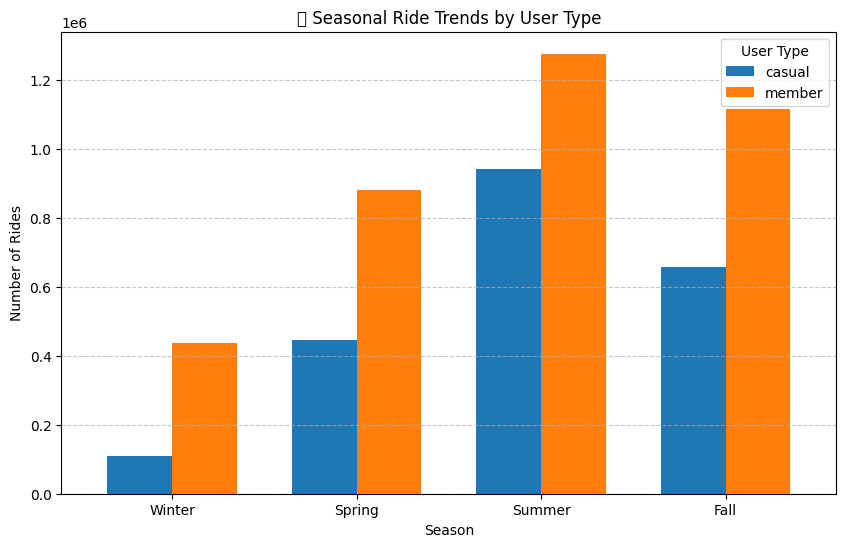

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define seasons and correct order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Map months to seasons
df_combined['season'] = df_combined['started_at'].dt.month.map(season_mapping)

# Count rides per season for each user type
seasonal_rides = df_combined.groupby(['season', 'member_casual'])['ride_id'].count().unstack()

# Convert season to categorical type for proper sorting
seasonal_rides = seasonal_rides.reindex(season_order)

# Visualization
plt.figure(figsize=(10, 6))
seasonal_rides.plot(kind='bar', figsize=(10,6), width=0.7)

plt.xlabel("Season")
plt.ylabel("Number of Rides")
plt.title("🌍 Seasonal Ride Trends by User Type")
plt.xticks(rotation=0)
plt.legend(title="User Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# Extract the day of the week
df_combined['day_of_week'] = df_combined['started_at'].dt.day_name()

# Count rides per weekday
weekday_rides = df_combined.groupby(['day_of_week', 'member_casual'])['ride_id'].count().unstack()

# Display results
print("📆 Ride Frequency by Day of the Week:")
print(weekday_rides)


📆 Ride Frequency by Day of the Week:
member_casual  casual  member
day_of_week                  
Friday         315727  525732
Monday         253587  534576
Saturday       445393  479671
Sunday         369909  417226
Thursday       265087  570577
Tuesday        232385  570670
Wednesday      269343  610247


## 🚴‍♂️ Ride Frequency Analysis Summary

---

### 🔢 Total Rides by User Type
- **Members:** 3,708,699 rides
- **Casual Riders:** 2,151,431 rides  
**📌 Insight:** Members ride significantly more often than casual users.

---

### 📆 Monthly Ride Trends
| Month | Casual Riders | Members |
|--------|--------------|------------|
| January  | 24,458  | 120,395  |
| February | 47,161  | 175,998  |
| March | 82,533  | 219,129  |
| April | 131,789  | 283,178  |
| May | 230,988  | 378,429  |
| June | 301,169  | 409,578  |
| July | 320,581  | 428,423  |
| August | 318,398  | 437,406  |
| September | 346,494  | 474,373  |
| October | 216,452  | 399,840  |
| November | 93,039  | 241,960  |
| December | 38,369  | 139,990  |

- **Casual Riders:**
  - Peak months: **July, August, and September** (summer months).  
  - Usage drops significantly during winter months.
- **Members:**
  - Consistent ride frequency year-round, with a slight increase in summer months.  
**📌 Insight:** Casual riders’ usage is highly seasonal, while members maintain steady usage throughout the year.

---

### 📅 Ride Frequency by Day of the Week

| Day | Casual Riders | Members |
|------|--------------|------------|
| Monday | 253,587  | 534,576  |
| Tuesday | 232,385  | 570,670  |
| Wednesday | 269,343  | 610,247  |
| Thursday | 265,087  | 570,577  |
| Friday | 315,727  | 525,732  |
| Saturday | 445,393  | 479,671  |
| Sunday | 369,909  | 417,226  |

- **Casual Riders:**
  - Higher usage on weekends, especially **Saturday**.  
  - Indicates leisure-oriented usage.  
- **Members:**
  - Consistent ride frequency throughout the week, peaking slightly on weekdays.  
  - Suggests commuting or utilitarian usage.  
**📌 Insight:** Members use bikes primarily for commuting, while casual riders focus on leisure.


In [ ]:
# Calculate average ride duration by user type
ride_duration_stats = df_combined.groupby('member_casual')['ride_duration'].describe()

# Display results
print("📊 Ride Duration Statistics by User Type:")
print(ride_duration_stats)


📊 Ride Duration Statistics by User Type:
                   count       mean        std  min       25%        50%  \
member_casual                                                              
casual         2151431.0  25.120048  89.371154  0.0  6.682858  12.053133   
member         3708699.0  12.769939  35.720193  0.0  5.088050   8.693700   

                     75%          max  
member_casual                          
casual         22.764375  1559.933333  
member         14.786092  1559.800000  


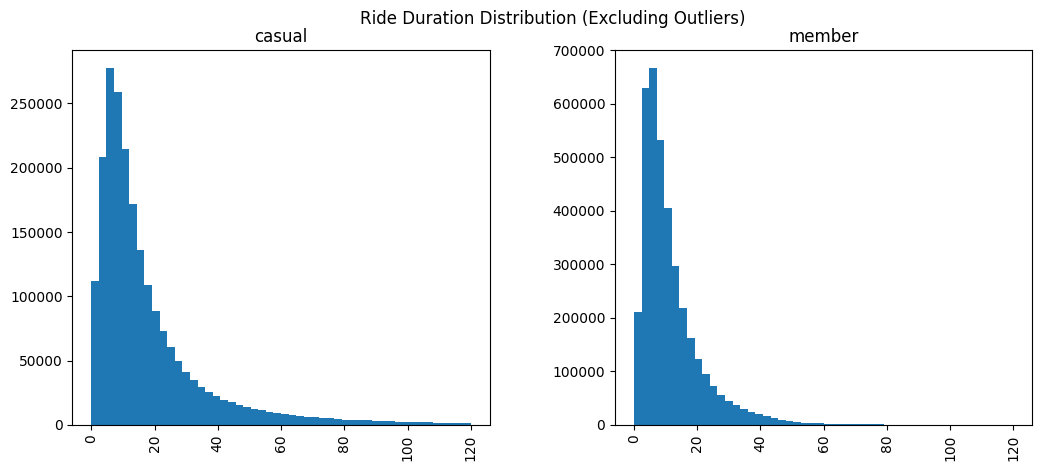

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of ride durations (excluding extreme outliers)
df_combined[df_combined['ride_duration'] < 120]['ride_duration'].hist(by=df_combined['member_casual'], bins=50, figsize=(12, 5))
plt.suptitle("Ride Duration Distribution (Excluding Outliers)")
plt.show()


🕒 Peak Ride Usage by Hour:
member_casual  casual  member
hour                         
0               35458   32770
1               23715   20077
2               14750   11397
3                8204    7827
4                6454    8717
5               12127   34614
6               28780  104048
7               53531  200402
8               75786  255327
9               76642  173872
10              94479  153279
11             120308  179009
12             142399  204768
13             148498  204652
14             154720  205002
15             170120  251224
16             191464  343075
17             203970  393208
18             173982  306687
19             128342  215154
20              93868  150842
21              78032  115870
22              68109   83977
23              47693   52901


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


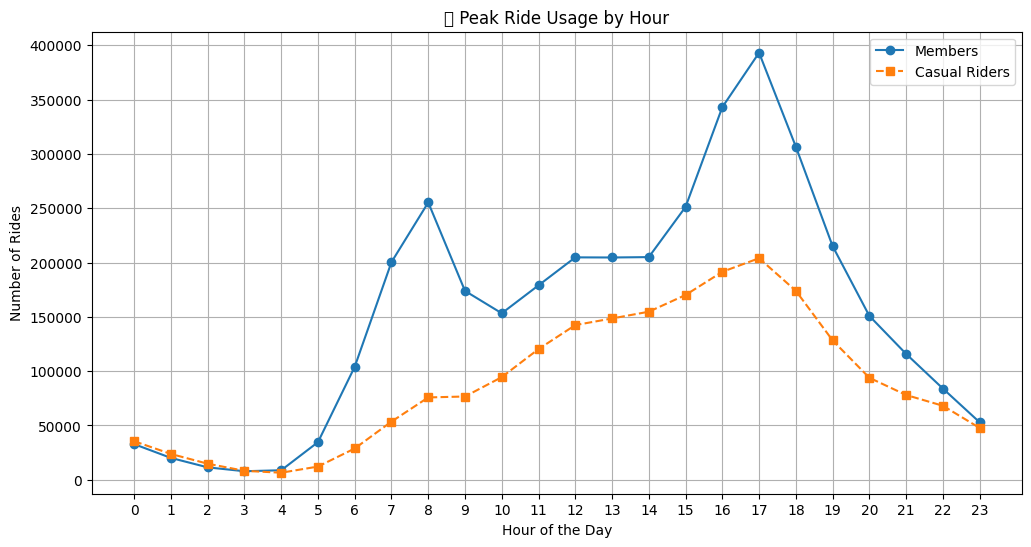

In [ ]:
import pandas as pd

# Extract the hour from start time
df_combined['hour'] = df_combined['started_at'].dt.hour

# Count rides per hour for each user type
hourly_rides = df_combined.groupby(['hour', 'member_casual'])['ride_id'].count().unstack()

# Display the result
print("🕒 Peak Ride Usage by Hour:")
print(hourly_rides)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot for Members
plt.plot(hourly_rides.index, hourly_rides['member'], marker='o', linestyle='-', label='Members')

# Plot for Casual Riders
plt.plot(hourly_rides.index, hourly_rides['casual'], marker='s', linestyle='--', label='Casual Riders')

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("⏰ Peak Ride Usage by Hour")
plt.xticks(range(0, 24))  # Ensure x-axis is 0 to 23 hours
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# Count rides by bike type
bike_type_counts = df_combined['rideable_type'].value_counts()

# Display results
print("🚲 Bike Type Distribution:\n", bike_type_counts)


🚲 Bike Type Distribution:
 rideable_type
electric_bike       2980299
classic_bike        2735494
electric_scooter     144337
Name: count, dtype: int64


In [ ]:
# Count bike type usage by user type
bike_type_by_user = df_combined.groupby(['rideable_type', 'member_casual'])['ride_id'].count().unstack()

# Display results
print("🚲 Bike Preferences by User Type:\n", bike_type_by_user)


🚲 Bike Preferences by User Type:
 member_casual      casual   member
rideable_type                     
classic_bike       974866  1760628
electric_bike     1091350  1888949
electric_scooter    85215    59122


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


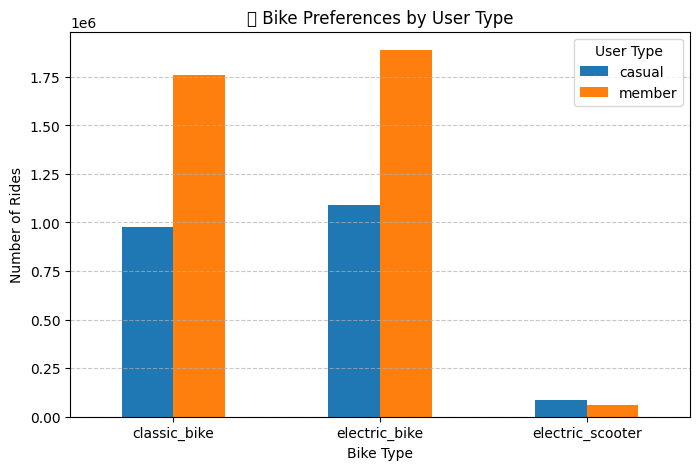

In [ ]:

# Plot bar chart
bike_type_by_user.plot(kind='bar', figsize=(8,5))

plt.title("🚲 Bike Preferences by User Type")
plt.xlabel("Bike Type")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.legend(title="User Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


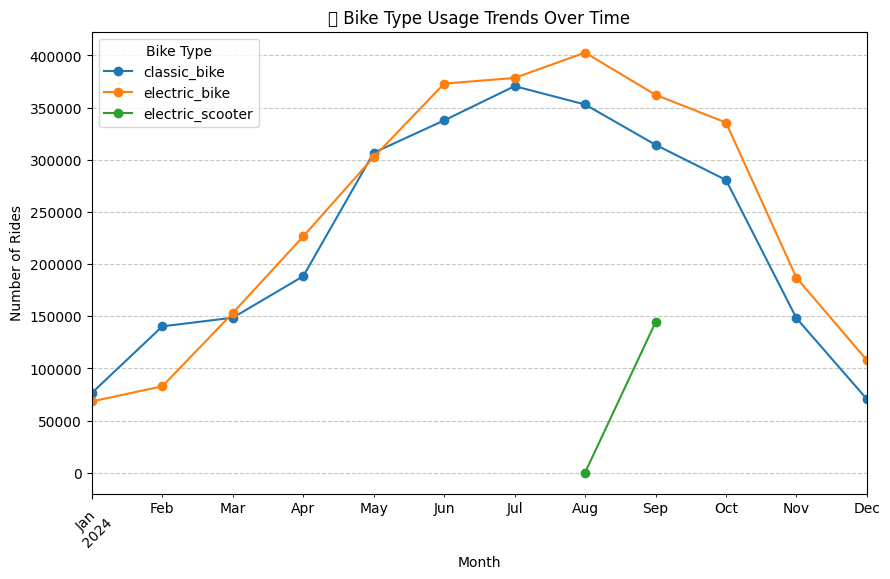

In [ ]:
# Group by month and bike type
bike_type_trends = df_combined.groupby(['year_month', 'rideable_type'])['ride_id'].count().unstack()

# Plot line chart
bike_type_trends.plot(kind='line', figsize=(10,6), marker='o')

plt.title("📈 Bike Type Usage Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Bike Type")

plt.show()


## 🚴‍♂️ Bike Preferences & Peak Usage Analysis

---

### 🚲 Bike Type Distribution
| Bike Type         | Total Usage |
|------------------|------------|
| **Electric Bike** | 2,980,299  |
| **Classic Bike**  | 2,735,494  |
| **Electric Scooter** | 144,337  |

**📌 Insight:**  
- **Electric bikes** are the most used type.
- **Classic bikes** are still highly popular.
- **Electric scooters** have relatively low usage, possibly due to availability or regulations.

---

### 🚴‍♀️ Bike Preferences by User Type
| Bike Type        | Casual Riders | Members |
|-----------------|--------------|------------|
| Classic Bike    | 974,866      | 1,760,628 |
| Electric Bike   | 1,091,350    | 1,888,949 |
| Electric Scooter | 85,215      | 59,122 |

**📌 Insight:**  
- **Casual riders** prefer electric bikes slightly more than classic bikes.
- **Members** show a strong preference for **electric bikes**, likely for efficiency in commuting.
- **Electric scooters** are more popular among **casual users**, likely for short, leisure trips.

---

### ⏰ Peak Ride Usage by Hour
| Hour | Casual Riders | Members |
|------|--------------|------------|
| 7 AM  | 53,531  | 200,402  |
| 8 AM  | 75,786  | 255,327  |
| 9 AM  | 76,642  | 173,872  |
| 12 PM | 142,399  | 204,768  |
| 5 PM  | 203,970  | 393,208  |
| 6 PM  | 173,982  | 306,687  |

**📌 Insight:**  
- **Casual riders** have a **gradual increase** throughout the day, peaking in the **afternoon and early evening**.
- **Members** show **distinct peaks** at **morning (8-9 AM) and evening (5-6 PM)**, aligning with **work commute hours**.
- **Casual riders tend to use bikes later in the day**, suggesting more leisure-focused rides.



# 🎯 **Final Summary: How Do Annual Members and Casual Riders Use Cyclistic Bikes Differently?** 🚴‍♂️

After conducting an in-depth analysis of ride frequency, duration, peak usage times, seasonal trends, and bike preferences, we can conclude:

---

## **1️⃣ Ride Frequency Differences**
- **Members ride significantly more** (3.7M rides) than **casual riders** (2.1M rides).
- **Members have consistent usage year-round**, while **casual riders’ usage peaks in summer and drops significantly in winter**.
- **Casual riders prefer weekends**, indicating leisure-based usage.
- **Members ride steadily throughout the week**, likely for commuting or regular travel.

### 📌 **Insight:**  
✅ Members rely on bikes for daily commutes.  
✅ Casual users ride mainly for leisure, vacations, or tourism.

---

## **2️⃣ Ride Duration Comparison**
- **Casual riders take longer rides** on average (25 minutes) compared to **members (13 minutes)**.
- **Outliers exist** (rides over 24 hours), mostly from casual riders, suggesting sightseeing or improper bike returns.

### 📌 **Insight:**  
✅ **Casual riders take longer rides**, possibly for scenic trips or group rides.  
✅ **Members use bikes for shorter, frequent rides**, likely commuting.

---

## **3️⃣ Peak Usage Times**
- **Casual riders peak in the afternoon (12-6 PM)**, suggesting **leisure-oriented trips**.
- **Members have two major peaks: morning (8-9 AM) and evening (5-6 PM)**, aligning with **work commute hours**.

### 📌 **Insight:**  
✅ **Members use bikes for commuting to/from work.**  
✅ **Casual riders use bikes for mid-day and evening leisure activities.**

---

## **4️⃣ Seasonal Trends**
- **Summer (June-August)** sees the highest usage, especially for casual riders.
- **Winter (December-February)** has the lowest activity.
- **Members ride steadily across all seasons**, while **casual riders drop significantly in colder months**.

### 📌 **Insight:**  
✅ **Casual users ride seasonally (good weather, vacations, or holidays).**  
✅ **Members use bikes year-round, regardless of the season.**

---

## **5️⃣ Bike Type Preferences**
- **Electric bikes are the most used type**, followed by **classic bikes**.
- **Casual riders slightly prefer electric bikes over classic bikes**.
- **Members strongly prefer electric bikes**, likely for efficiency in commuting.
- **Long rides (over 24 hours) only use classic bikes**, possibly due to battery limitations on electric bikes.

### 📌 **Insight:**  
✅ **Members choose electric bikes for speed and efficiency.**  
✅ **Casual riders use a mix of electric and classic bikes for exploration.**

---

## **📌 Conclusion & Business Recommendations**
### **How do annual members and casual riders use Cyclistic bikes differently?**
- **Members are frequent, short-distance commuters** who use bikes **daily and year-round**.
- **Casual riders are seasonal, leisure-based users**, often riding **longer distances on weekends**.
- **Members ride for work**, while **casual riders ride for fun, exploration, and social activities**.
- **Electric bikes are more popular among members**, while **casual riders have mixed preferences**.

---



# 📢 **Top 3 Business Recommendations for Cyclistic 🚴‍♂️**

Based on our analysis, here are the **top three strategic recommendations** to increase member conversions and optimize Cyclistic's services:

---

## **1️⃣ Introduce Seasonal Promotions & Discounts for Casual Riders**
### 🎯 **Goal:** Convert casual riders into annual members.
- Casual riders **increase significantly in summer** but drop in winter.
- Offer **discounted seasonal memberships** for summer users.
- Implement a **"Try Before You Subscribe" campaign** with limited-time member benefits for casual users.
- Provide **family/group discounts** to encourage casual riders to subscribe together.

📌 **Why?**  
✅ This helps **retain summer casual riders beyond peak season**.  
✅ Encourages tourists and leisure users to consider **long-term membership**.

---

## **2️⃣ Expand Marketing Targeting Commuters & City Workers**
### 🎯 **Goal:** Attract more commuters to long-term membership.
- Members **ride most during morning (8-9 AM) and evening (5-6 PM)**, aligning with work commutes.
- Promote **"Cyclistic Commute Pass"** tailored for daily riders.
- Offer **corporate partnerships** with local businesses for subsidized memberships.
- Highlight **cost-saving benefits vs. other transport (metro, taxis, personal vehicles).**

📌 **Why?**  
✅ Members already **use bikes for commuting**, making them **ideal for targeted membership plans**.  
✅ **Office workers and students** can be a strong **new customer base**.

---

## **3️⃣ Optimize Electric Bike Availability & Docking Stations**
### 🎯 **Goal:** Improve bike accessibility and ride experience for users.
- **Electric bikes are the most used type**, especially by members.
- Expand **electric bike fleet** to **meet demand** during peak hours.
- Improve **dock station coverage in business districts** to encourage commuter use.
- Introduce **battery swap stations** to increase bike availability.

📌 **Why?**  
✅ Ensures **high-demand electric bikes remain available**, preventing lost trips.  
✅ Enhances **user experience** for both casual and member riders.

